In [21]:
# Import relevant libraries and the English language model 
import pandas as pd
import spacy
import en_core_web_sm
import re
from collections import Counter
import numpy as np

# Load the English tokenizer, tagger, parser, and NER
nlp = spacy.load("en_core_web_sm")

In [22]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('all_lyrics.csv') #reads a CSV file named 'all_lyrics.csv' 
df

,song,artist,type,lyrics
0,Stairway to Heaven,Led Zeppelin,rock,Stairway to Heaven Lyrics[Intro]\n\n[Verse 1]\...
1,Hey Jude,Beatles,rock,Hey Jude Lyrics[Verse 1: Paul McCartney]\nHey ...
2,All Along the Watchtower,"Hendrix, Jimi",rock,"Ii. Tambourine Lyrics[Chorus, sung]\nHey, Pip,..."
3,Satisfaction,Rolling Stones,rock,"Sin título I Lyrics[Letra de ""Sin título I""]\n..."
4,Like A Rolling Stone,"Dylan, Bob",rock,Like a Rolling Stone Lyrics[Verse 1]\nOnce upo...
...,...,...,...,...
3995,Motown 25,Elzhi,rap & hip hop,Motown 25 Lyrics[Verse 1: eLZhi]\nI end career...
3996,How Ya Like Me Now,Kool Moe Dee,rap & hip hop,"How Ya Like Me Now Lyrics""All aboard for the n..."
3997,Coastin’,Zion I feat. K.Flay,rap & hip hop,Coastin’ LyricsWhen life brings trouble\nYou c...
3998,Head Banger,EPMD,rap & hip hop,Headbanger Lyrics[Redman]\nNegroes!!!!!!!!\n\n...


In [23]:
# We select rows where the value in the 'type' is equal to 'rap & hip hop' since there are other genres in the corpus
rap_lyrics_df = df[df['type'] == 'rap & hip hop']
rap_lyrics_df

,song,artist,type,lyrics
3000,C.R.E.A.M.,Wu-Tang Clan,rap & hip hop,NaN
3001,Mind Playin’ Tricks,Geto Boys,rap & hip hop,Going Crazy Lyrics{*harmonizes*}\n\n[Verse 1]\...
3002,Juicy,Notorious B.I.G.,rap & hip hop,"Juicy Lyrics[Intro: The Notorious B.I.G.]\n(""F..."
3003,I Seen A Man Die,Scarface,rap & hip hop,I Seen a Man Die Lyrics[Intro: Scarface + (fri...
3004,Dead Presidents II,Jay-Z,rap & hip hop,Dead Presidents II Lyrics[Produced by Ski Beat...
...,...,...,...,...
3995,Motown 25,Elzhi,rap & hip hop,Motown 25 Lyrics[Verse 1: eLZhi]\nI end career...
3996,How Ya Like Me Now,Kool Moe Dee,rap & hip hop,"How Ya Like Me Now Lyrics""All aboard for the n..."
3997,Coastin’,Zion I feat. K.Flay,rap & hip hop,Coastin’ LyricsWhen life brings trouble\nYou c...
3998,Head Banger,EPMD,rap & hip hop,Headbanger Lyrics[Redman]\nNegroes!!!!!!!!\n\n...


In [24]:
# Example of lyrics
print(rap_lyrics_df['lyrics'][3003])



I Seen a Man Die Lyrics[Intro: Scarface + (friend)]
(So what you gonna do when you get outta here cat daddy?)
I don't know dawg. I'm just trying to live it one day at a time, ya know?
(I hear you talkin' man, live it one day at a time...)
(It ain't nothing but a thang though, bro)
Yeah I hear you fool...
Well let me get up outta here, my ride out here waitin' for me
(Alright cat daddy, take it easy baby)
You stay up fool
(Peace)
[Verse 1: Scarface]
He greets his father with his hands out
Rehabilitated slightly, but glad to be the man's child
The world is different since he's seen it last
Out of jail, been seven years and he's happy that he's free at last
All he had was his mother's letters
Now he's mobile and he's gotta make a change and make it for the better
But he's black so he's got one strike against him
And he's young, plus he came up in the system
But he's smart and he's finally making eighteen
And his goal's to get on top and try to stay clean
So he's calling up his homie who d

In [25]:
rap_lyrics_selected = rap_lyrics_df.head(160) # Selects the first 160 lyrics

# Converts the column 'lyrics' into a list of strings, values help to eliminate the index number
lyrics_rap_hiphop = list(str(rap_lyrics_selected['lyrics'].values))

In [26]:
# Converts the list of strings into a single string by joining all the strings together
lyrics_rap_hiphop = ''.join(list(lyrics_rap_hiphop))

In [27]:
# Cleaning text from HTML with regular expressions
cleaned_text = re.sub(r'\\n', ' ', lyrics_rap_hiphop)
cleaned_text = re.sub(r"\\'", "'", cleaned_text)
cleaned_text = re.sub(r"[0-9]+Embed", " ", cleaned_text)

In [28]:
doc = nlp(cleaned_text) #tokenization & lemmatization using spaCy

In [29]:
# All tokens that aren't punctuation marks
words = [token.text
         for token in doc
         if not token.is_punct] 
word_freq = Counter(words)

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
# Creating DataFrame with word-frequency data
df = pd.DataFrame.from_records(list(dict(Counter(words)).items()), columns=['word','frequency'])

In [31]:
# Each word gets a rank based on its frequency
df = df.sort_values(by=['frequency'], ascending=False)
df['rank'] = list(range(1, len(df) + 1))
df

,word,frequency,rank
40,the,6134,1
20,I,3992,2
10,a,2638,3
44,and,2612,4
88,to,2603,5
...,...,...,...
14026,Firestarr,1,24231
14027,Fredro,1,24232
3287,runts,1,24233
14029,Blunted,1,24234


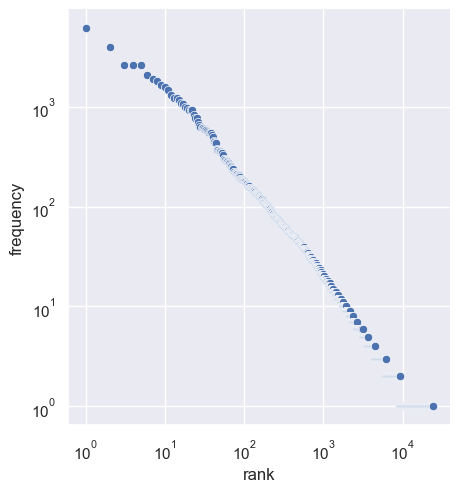

In [32]:
g = sns.relplot(x="rank", y="frequency", data=df)
g.set(xscale="log")
g.set(yscale="log")

In [33]:
df['ln_frequency']=np.log(df['frequency'])
df['ln_rank']=np.log(df['rank'])

In [34]:
df.to_csv("english_frequencies.csv") #We create a csv file to later plot 2 languages on the same graph

In [35]:
y=df['ln_frequency']
x=df['ln_rank']

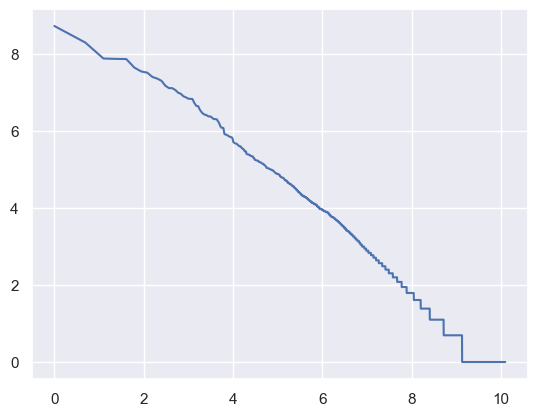

In [36]:
fig, ax = plt.subplots()
ax.plot(x,y,)
plt.show()